In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train[..., tf.newaxis]  # Add channel dimension
x_test = x_test[..., tf.newaxis]

In [4]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Define a simple CNN model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [6]:
# Train baseline model
baseline_model = build_model()
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7041 - loss: 0.8163 - val_accuracy: 0.8584 - val_loss: 0.3726
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - accuracy: 0.8551 - loss: 0.3981 - val_accuracy: 0.8849 - val_loss: 0.3055
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 36ms/step - accuracy: 0.8754 - loss: 0.3469 - val_accuracy: 0.8930 - val_loss: 0.2885
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.8873 - loss: 0.3048 - val_accuracy: 0.8973 - val_loss: 0.2736
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.8946 - loss: 0.2887 - val_accuracy: 0.9028 - val_loss: 0.2597
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9070 - loss: 0.2568 - val_accuracy: 0.9054 - val_loss: 0.2549
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9111 - loss: 0.2412 - val_accuracy: 0.9074 - val_loss: 0.2507
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9170 -

In [7]:
# Train augmented model
augmented_model = build_model()
augmented_history = augmented_model.fit(
    data_gen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 46ms/step - accuracy: 0.5040 - loss: 1.3269 - val_accuracy: 0.7504 - val_loss: 0.6529
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6837 - loss: 0.8364 - val_accuracy: 0.7801 - val_loss: 0.5565
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 44ms/step - accuracy: 0.7176 - loss: 0.7559 - val_accuracy: 0.8019 - val_loss: 0.5129
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.7364 - loss: 0.7053 - val_accuracy: 0.8056 - val_loss: 0.5096
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7503 - loss: 0.6771 - val_accuracy: 0.8282 - val_loss: 0.4699
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7605 - loss: 0.6481 - val_accuracy: 0.8272 - val_loss: 0.4518
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7684 - loss: 0.6289 - val_accuracy: 0.8314 - val_loss: 0.4492
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.7784 - loss: 0.6

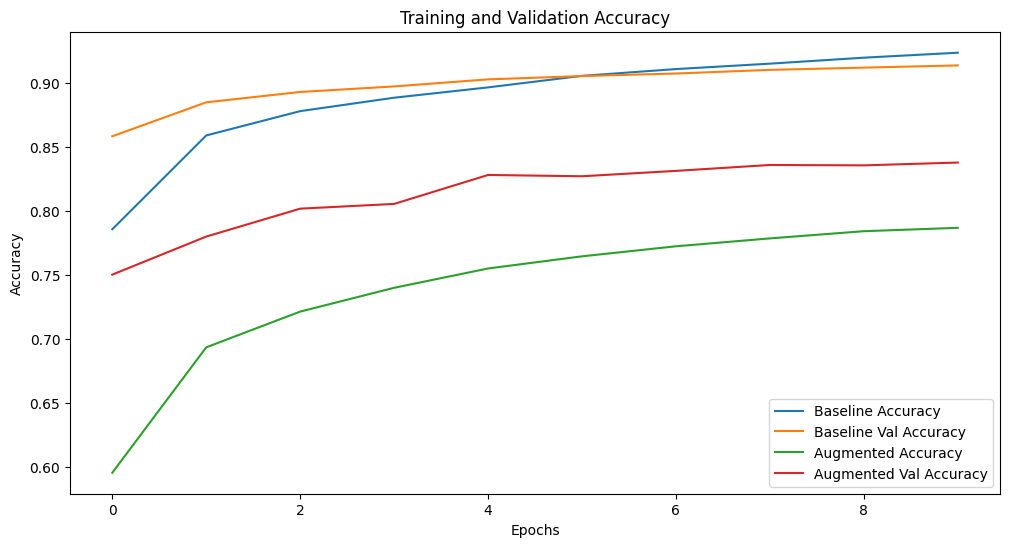

In [8]:
# Plot Training/Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(baseline_history.history['accuracy'], label='Baseline Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(augmented_history.history['accuracy'], label='Augmented Accuracy')
plt.plot(augmented_history.history['val_accuracy'], label='Augmented Val Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()